# InternSavy Data Science Internship

## Task -2

# Clustering Techniques for the any
## customer dataset using machine learning

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Loading dataset into dataframe
mall=pd.read_csv("Mall_Customers.csv")

# Exploratory Data Analysis - EDA

In [3]:
# Shows information or summary about the dataframe
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
# Shows the total number of rows and columns
mall.shape

(200, 5)

Contains 200 records and 5 features

In [5]:
# Shows column
mall.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
# Shows the types of datatypes of the columns
mall.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [7]:
# Displays first 5 records
mall.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
# Displays last 5 rows
mall.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [9]:
mall.value_counts()

CustomerID  Genre   Age  Annual Income (k$)  Spending Score (1-100)
1           Male    19   15                  39                        1
138         Male    32   73                  73                        1
128         Male    40   71                  95                        1
129         Male    59   71                  11                        1
130         Male    38   71                  75                        1
                                                                      ..
70          Female  32   48                  47                        1
71          Male    70   49                  55                        1
72          Female  47   49                  42                        1
73          Female  60   50                  49                        1
200         Male    30   137                 83                        1
Length: 200, dtype: int64

## Missing Values

In [10]:
mall.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

No Missing Values or null values found

In [11]:
# Dropping customer idm
mall=mall.drop('CustomerID',axis=1)

In [12]:
# Checking back inorder to verify if customer id is dropped or not
mall.columns

Index(['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [13]:
mall.shape

(200, 4)

In [14]:
mall.columns

Index(['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

# Outliers

<AxesSubplot:>

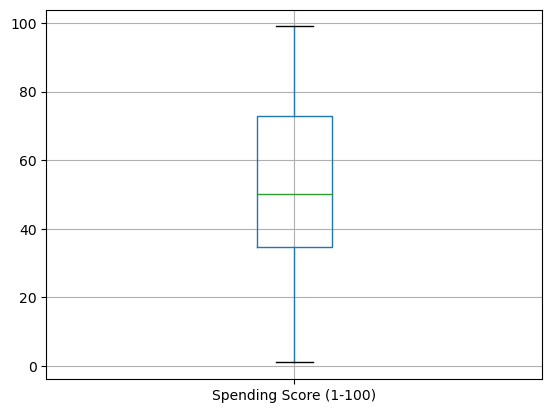

In [15]:
# Construct boxplot for detecting outliers
mall.boxplot(column=['Spending Score (1-100)'])

<AxesSubplot:>

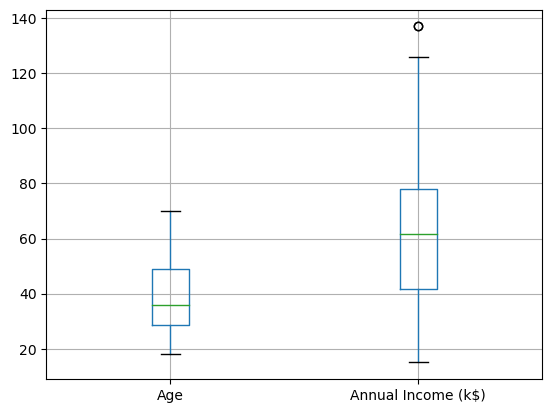

In [16]:
mall.boxplot(column=['Age','Annual Income (k$)'])

The Annual income column contains outliers

In [17]:
# Here the column is named incorrectly
mall['Gender']=mall['Genre']

In [18]:
mall['Gender']

0        Male
1        Male
2      Female
3      Female
4      Female
        ...  
195    Female
196    Female
197      Male
198      Male
199      Male
Name: Gender, Length: 200, dtype: object

In [19]:
mall.shape

(200, 5)

In [20]:
mall=mall.drop('Genre',axis=1)
mall

,Age,Annual Income (k$),Spending Score (1-100),Gender
0,19,15,39,Male
1,21,15,81,Male
2,20,16,6,Female
3,23,16,77,Female
4,31,17,40,Female
...,...,...,...,...
195,35,120,79,Female
196,45,126,28,Female
197,32,126,74,Male
198,32,137,18,Male


## Outlier Analysis

In [21]:
Q1=mall.quantile(0.25)
Q2=mall.quantile(0.50)
Q3=mall.quantile(0.75)
Q1,Q2,Q3

(Age                       28.75
 Annual Income (k$)        41.50
 Spending Score (1-100)    34.75
 Name: 0.25, dtype: float64,
 Age                       36.0
 Annual Income (k$)        61.5
 Spending Score (1-100)    50.0
 Name: 0.5, dtype: float64,
 Age                       49.0
 Annual Income (k$)        78.0
 Spending Score (1-100)    73.0
 Name: 0.75, dtype: float64)

In [22]:
# iNTERQUARTILE range
iqr=Q3-Q1
print(iqr)

Age                       20.25
Annual Income (k$)        36.50
Spending Score (1-100)    38.25
dtype: float64


In [23]:
lower_bound=Q1-(1.5*iqr)
upper_bound=Q3+(1.5*iqr)

In [24]:
outliers=((mall<lower_bound)|(mall>upper_bound))

C:\Users\ashit\AppData\Local\Temp\ipykernel_2804\2204698222.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers=((mall<lower_bound)|(mall>upper_bound))


In [25]:
outliers

,Age,Annual Income (k$),Gender,Spending Score (1-100)
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,True,False,False


In [26]:
# Identify rows with at least one outlier
outlier_rows = outliers.any(axis=1)

# Display the rows with at least one outlier
outliers_data = mall[outlier_rows]
print(outliers_data)

     Age  Annual Income (k$)  Spending Score (1-100) Gender
198   32                 137                      18   Male
199   30                 137                      83   Male


## Removal of Outliers

In [27]:
no_out=mall[~outliers.any(axis=1)]
no_out

,Age,Annual Income (k$),Spending Score (1-100),Gender
0,19,15,39,Male
1,21,15,81,Male
2,20,16,6,Female
3,23,16,77,Female
4,31,17,40,Female
...,...,...,...,...
193,38,113,91,Female
194,47,120,16,Female
195,35,120,79,Female
196,45,126,28,Female


In [28]:
# Copying it back to the original one
mall=no_out.copy()
mall

,Age,Annual Income (k$),Spending Score (1-100),Gender
0,19,15,39,Male
1,21,15,81,Male
2,20,16,6,Female
3,23,16,77,Female
4,31,17,40,Female
...,...,...,...,...
193,38,113,91,Female
194,47,120,16,Female
195,35,120,79,Female
196,45,126,28,Female


## Univariate Analysis

In [29]:
mall.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender'], dtype='object')

In [30]:
mall['Age']

0      19
1      21
2      20
3      23
4      31
       ..
193    38
194    47
195    35
196    45
197    32
Name: Age, Length: 198, dtype: int64

In [31]:
mall['Age'].min()

18

In [32]:
mall['Age'].max()

70

### Minimum age of customers is 18 and maximum is 70

In [33]:
mall['Age'].describe()

count    198.000000
mean      38.929293
std       14.016852
min       18.000000
25%       28.250000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

#### Annual Income

In [35]:
mall['Annual Income (k$)']

0       15
1       15
2       16
3       16
4       17
      ... 
193    113
194    120
195    120
196    126
197    126
Name: Annual Income (k$), Length: 198, dtype: int64

In [36]:
mall['Annual Income (k$)'].describe()

count    198.000000
mean      59.787879
std       25.237259
min       15.000000
25%       40.500000
50%       61.000000
75%       77.750000
max      126.000000
Name: Annual Income (k$), dtype: float64

### Spending Score

In [37]:
mall['Spending Score (1-100)']

0      39
1      81
2       6
3      77
4      40
       ..
193    91
194    16
195    79
196    28
197    74
Name: Spending Score (1-100), Length: 198, dtype: int64

In [38]:
mall['Spending Score (1-100)'].describe()

count    198.000000
mean      50.196970
std       25.746846
min        1.000000
25%       35.000000
50%       50.000000
75%       72.750000
max       99.000000
Name: Spending Score (1-100), dtype: float64

Dropping AGE and Gender column since it was found as irrevelant

In [39]:
drop_col=['Age','Gender']
mall=mall.drop(columns=drop_col,axis=1)

In [40]:
print(mall)

     Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
193                 113                      91
194                 120                      16
195                 120                      79
196                 126                      28
197                 126                      74

[198 rows x 2 columns]


In [41]:
mall['A']= mall[['Annual Income (k$)']]
mall['B']= mall['Spending Score (1-100)']

In [42]:
# Constructing X
X=mall[['A','B']]
X.head()

,A,B
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


### Modelling

In [43]:
# Importing the neccessary libraries for clustering
from sklearn.cluster import KMeans

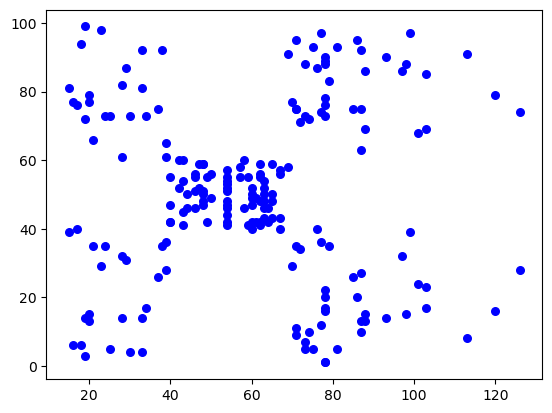

In [44]:
plt.scatter(X['A'], X['B'] , s=30,c='b')

In [45]:
Kmean=KMeans(n_clusters=5)
Kmean.fit(X)

KMeans(n_clusters=5)

In [46]:
centers=Kmean.cluster_centers_
print(centers)

[[85.21052632 82.10526316]
 [25.72727273 79.36363636]
 [55.0875     49.7125    ]
 [86.34285714 17.57142857]
 [26.30434783 20.91304348]]


In [47]:
clusters=Kmean.fit_predict(X)
mall["label"]=clusters
mall.head(100)

,Annual Income (k$),Spending Score (1-100),A,B,label
0,15,39,15,39,1
1,15,81,15,81,4
2,16,6,16,6,1
3,16,77,16,77,4
4,17,40,17,40,1
...,...,...,...,...,...
95,60,52,60,52,2
96,60,47,60,47,2
97,60,50,60,50,2
98,61,42,61,42,2


In [48]:
col=['green','blue','black','yellow','orange',]

green
blue
black
yellow
orange


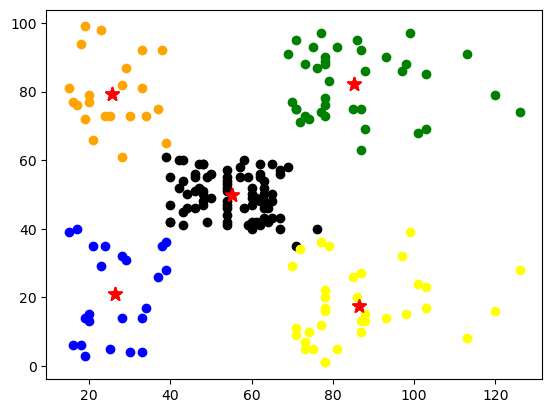

In [49]:
for i in range(5):
  a=col[i]
  print(a)
  plt.scatter(mall.A[mall.label==i],mall.B[mall.label==i],c=a,label='Cluster 1')
  plt.scatter(centers[:,0],centers[:,1],marker="*",s=100,c='r',label='Centroid')

5 clusters formed with centroids marked as " * "

In [50]:
X1=X.loc[:,["A","B"]].values

C:\Users\ashit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


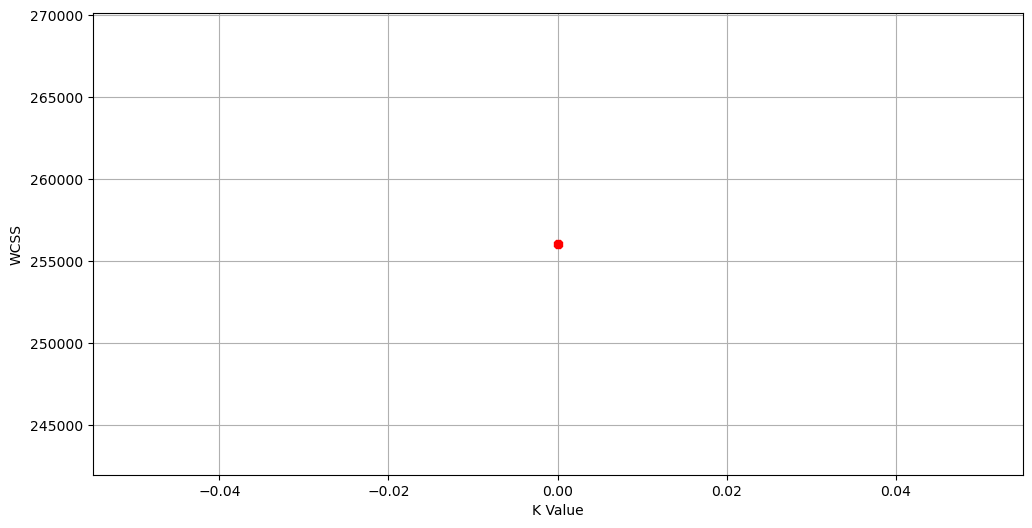

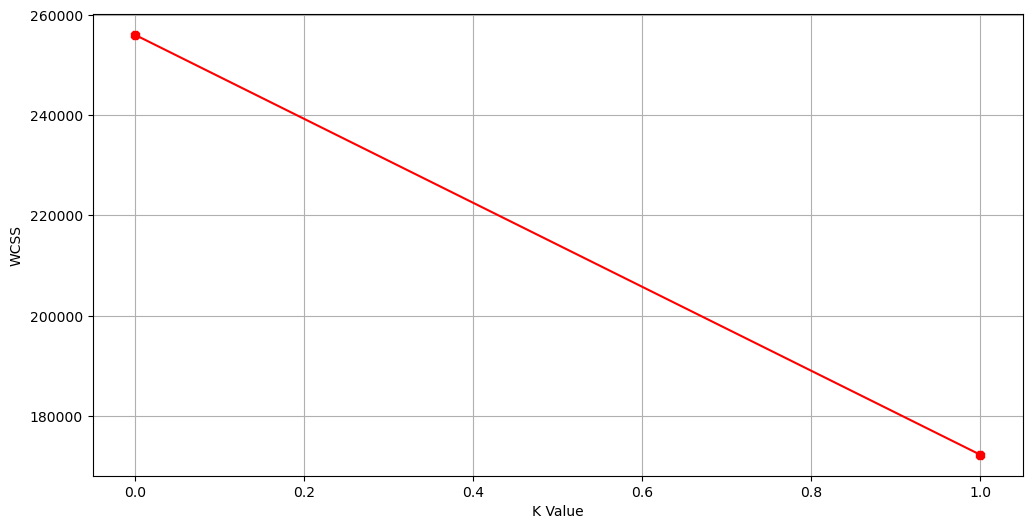

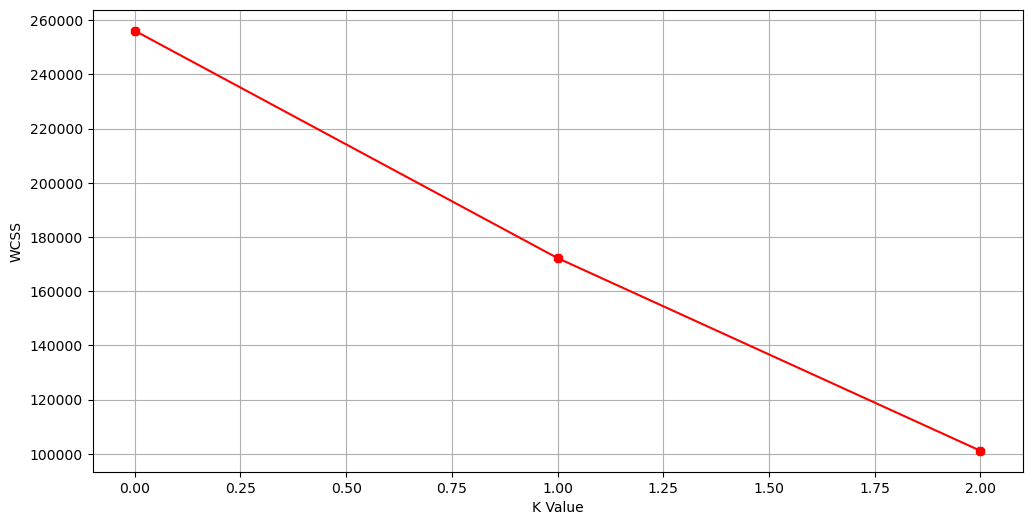

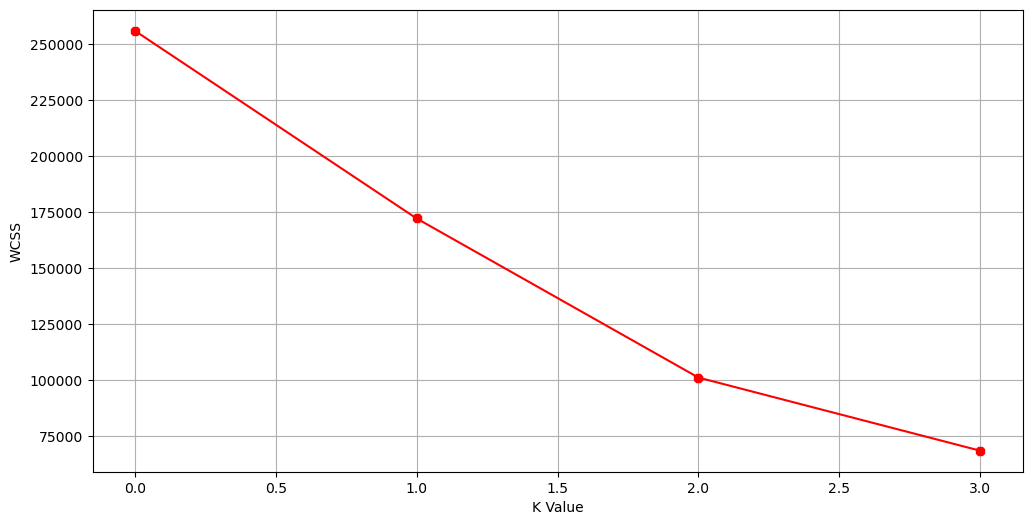

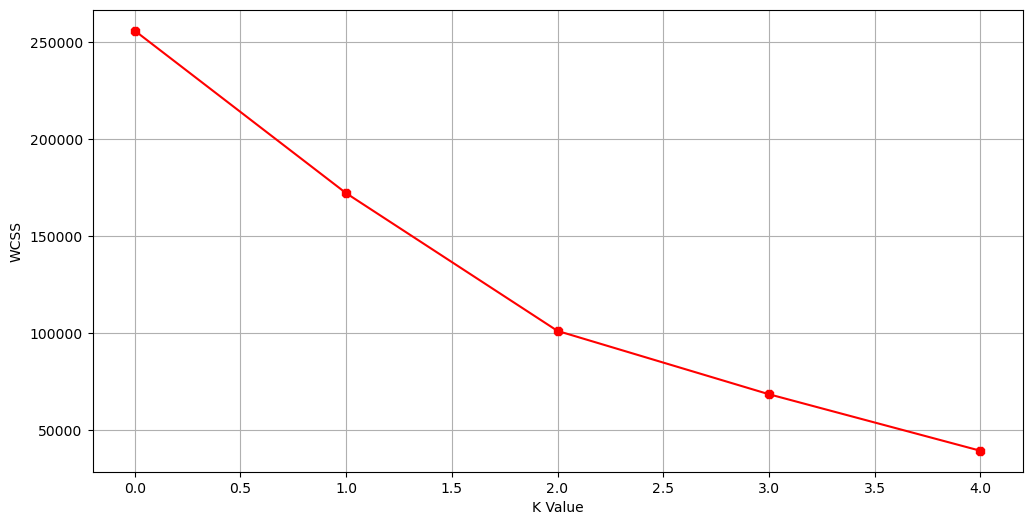

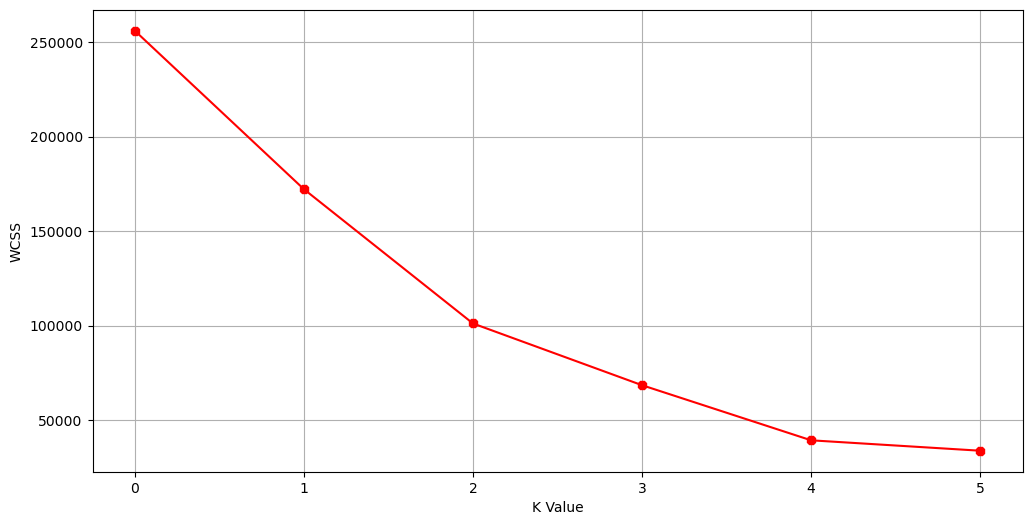

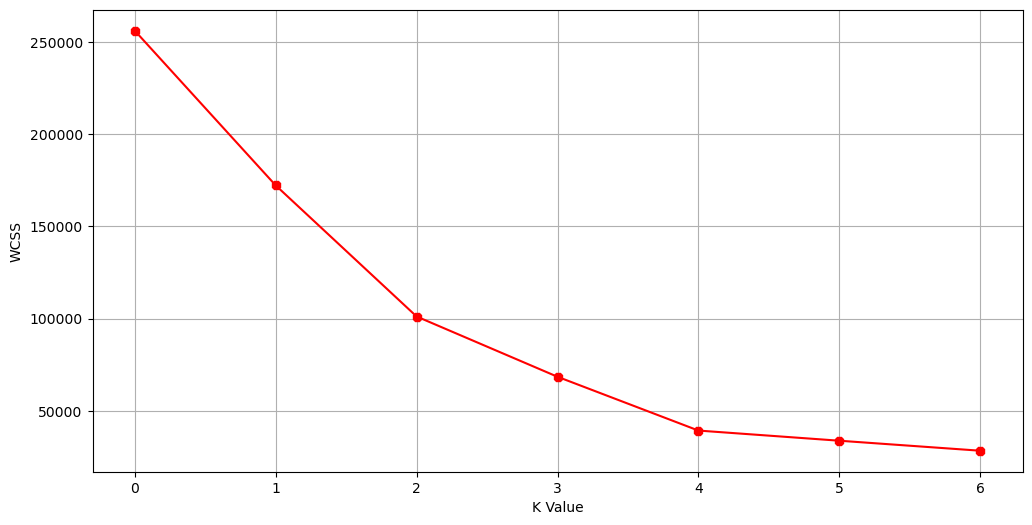

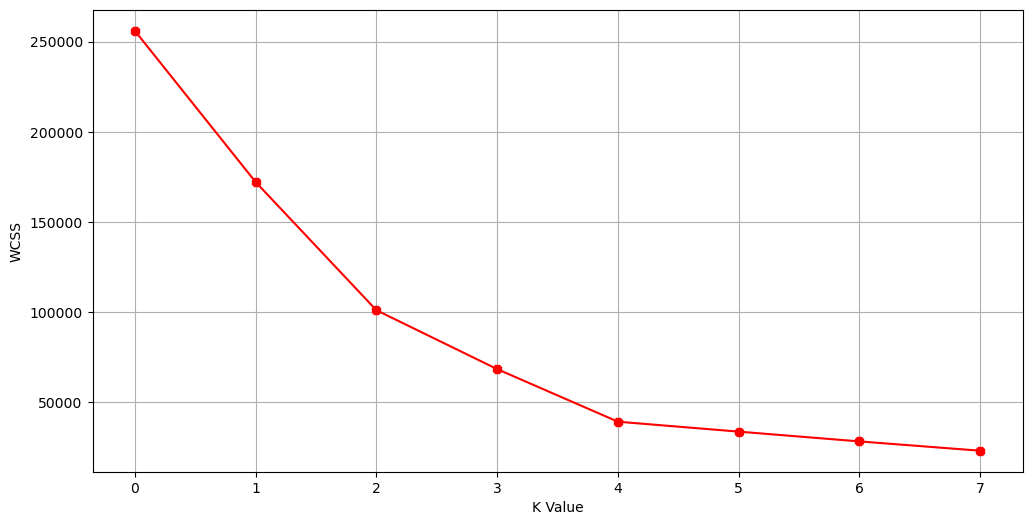

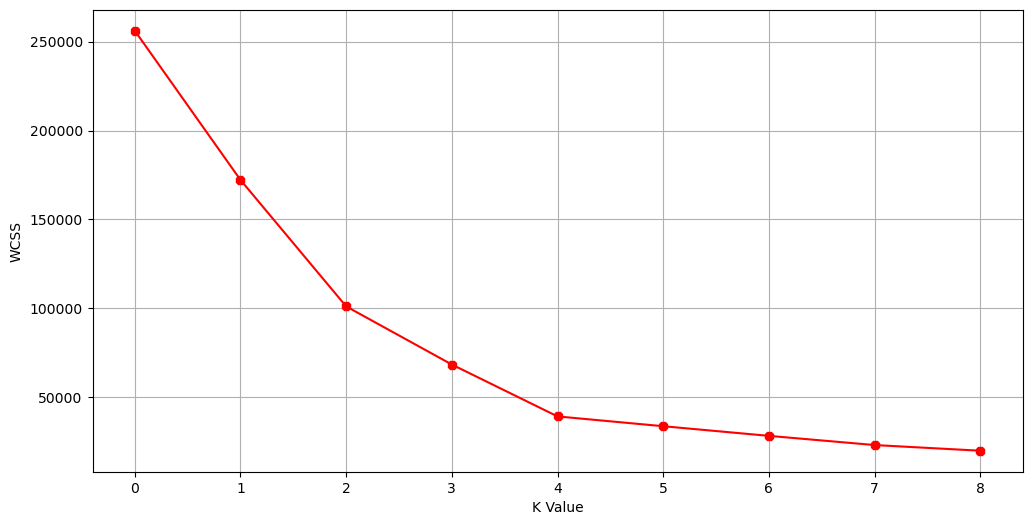

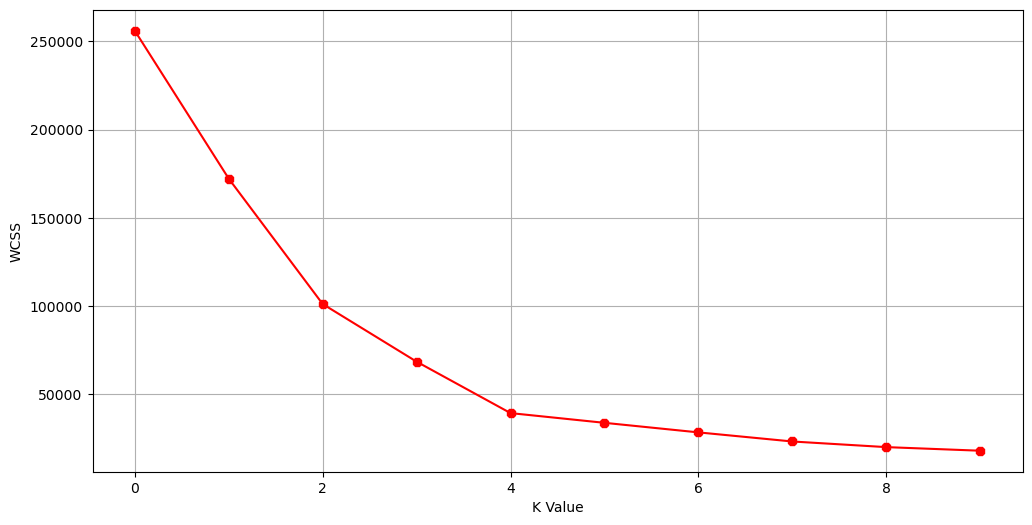

In [51]:
wcss=[] # Within Sum OF Squares
for k in range(1,11):
  kmeans=KMeans(n_clusters=k,init="k-means++")
  kmeans.fit(X1)
  wcss.append(kmeans.inertia_)
  plt.figure(figsize=(12,6))
  plt.grid()
  plt.plot(wcss,color="red",marker="8")
  plt.xlabel("K Value")
  plt.ylabel("WCSS")
  plt.show()


### The ideal value of k is 5 and 5 clusters are formed 